In [1]:
import nextnanopy as nn
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
import importlib


In [2]:
print(sys.path)
sys.path.append(r"C:\Users\splatt\nextnanopy_projects")
print(sys.path)

import nextnano_tools.helper_functions as hf
build_output = hf.build_output

import nextnano_tools.simstructs as ss
SimOut = ss.SimOut
# from nextnano_tools.simstructs import SimOut, BandStructure, Eigenstate

['c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\python313.zip', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\DLLs', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv', '', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib\\site-packages', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib\\site-packages\\win32', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib\\site-packages\\Pythonwin']
['c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\python313.zip', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\DLLs', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv', '', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib\\site-packages', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib\\site-packages\\win32', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Li

In [3]:
# # base_file_path = r"C:\Users\splatt\Documents\nextnano\Output\InGaAsInAlAs_6nm_valence_band_anticrossing_check_sweep_template\InGaAsInAlAs_6nm_valence_band_anticrossing_check_sweep_template.nnp"
# # base_filename = 'InGaAsInAlAs_thinner_valencesubbands_quantumonly_check_maxVB'
# # parent_dir = r'C:\Users\splatt\Documents\nextnano\Output\check_density_InGaAsInAlAs'

# # input_filepath = os.path.join(parent_dir, base_filename + '.nnp')
# sweep_base_filename = 'InGaAsInAlAs_2ddensity'
# input_filename = sweep_base_filename + '.nnp'
# generic_nextnano_output_dir = r"C:\Users\splatt\Documents\nextnano\Output"
# output_basepath = os.path.join(generic_nextnano_output_dir,sweep_base_filename)
# density_input = nn.InputFile(input_filename,product='nextnano++')
# # print(base_file_input)

In [4]:
VB_cutoff = 0.4
bias = r'bias_00000'
quantum_region = r'Quantum\quantum_region'
quantum_band = r'kp8'
quantum_band_interactions = r'kp8_kp8'
# output_basepath

In [5]:
# importlib.reload(hf)
# build_output = hf.build_output
# importlib.reload(ss)
# SimOut = ss.SimOut

In [6]:
test_out = r'C:\Users\splatt\Documents\nextnano\Output\sweeparond1.25cminv2'
simout = build_output(test_out,quantum_region,quantum_band,quantum_band_interactions,bias,VB_cutoff,6.0)

In [ ]:
test = np.array([0, 1, 2, 3])
testadding = test + 1
print(testadding)

In [ ]:
outpath = test_out
quantum_sims_path = os.path.join(outpath, bias, quantum_region)
energy_spectrum = nn.DataFile(os.path.join(quantum_sims_path, quantum_band, 'energy_spectrum_k00000.dat'), 'nextnano++')
energies = energy_spectrum.variables['Energy'].value
# print(energies[18])
print(energy_spectrum.variables)

indices_every_other = list(range(1, len(energy_spectrum.variables['Energy'].value), 2))
print(indices_every_other)
# testadding_indices = indices_every_other + 1

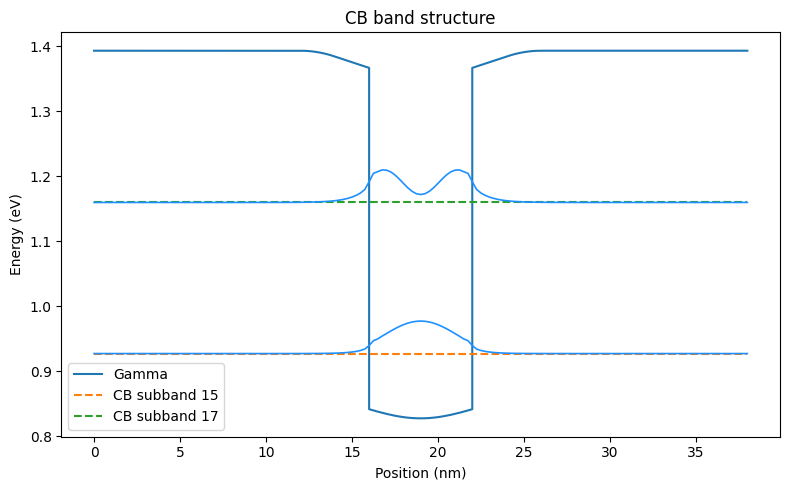

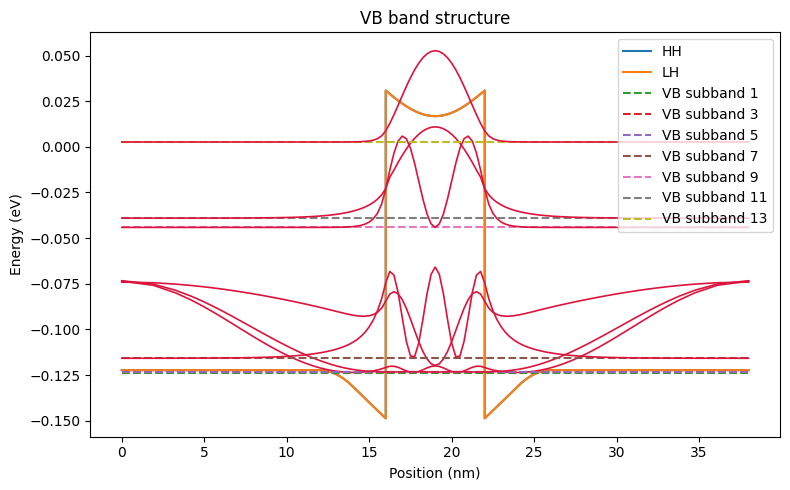

array([-0.12411459, -0.12359449, -0.12335784, -0.11583673, -0.04413983,
       -0.03906157,  0.00264956])

In [ ]:
# simout.plot_all_bands()
# simout.plot_all_bands
simout.bands['CB'].plot_band()
simout.bands['VB'].plot_band()
simout.bands['VB'].get_energies()
simout.plot_all_bands()

In [ ]:

densities2d = [1.25e12,1.5e12,1.75e12,2.0e12] #in cm^-2
# simout = build_output(parent_dir,quantum_region,quantum_band,quantum_band_interactions,bias,VB_cutoff,6.0)
# simouts = []
for density2d in densities2d:
    w_delta_donor = 2e-9 #m
    w_delta_donor_cm = w_delta_donor*1e2  #in cm
    n3dinvcc = density2d / w_delta_donor_cm  #in cm^-3
    #get density from either side
    density_input.set_variable('conccc',n3dinvcc/2) 
    print(f"Setting conc to {n3dinvcc/2:.2e} cm^-3 for 2D density {density2d:.2e} cm^-2")
    density_input.set_variable('delta_donor_w',w_delta_donor*1e9)  #in nm
    input_filesavename = str(density2d/1e11)+'e11cm2'
    subfolder_to_save = os.path.join(output_basepath,input_filesavename)
    print(f"Saving to subfolder {subfolder_to_save}")
    density_input.save(os.path.join(subfolder_to_save,input_filesavename+'.nnp'),overwrite=True)
    print(density_input)
    density_input.execute() #would need to set different output next time
    # simout = build_output(subfolder_to_save,quantum_region,quantum_band,quantum_band_interactions,bias,VB_cutoff,6.0)
    # simout.bands['VB'].sort_subbands(decreasing=True)
    # VB_subbands = simout.bands["VB"].get_energies()  # list of Eigenstate objects
    # CB_subbands = simout.bands["CB"].get_energies()      # all CB subbands
    # VB_mesh, CB_mesh = np.meshgrid(VB_subbands, CB_subbands)
    # transition_energies = CB_mesh - VB_mesh # Transpose VB mesh to get correct orientation
    # # Print transition table
    # print("\nTransition Energies Table for 2D Density: {:.2e} cm^-2".format(density2d))
    # print(" VB Energy (eV) (subband num) | CB Energy (eV) (subband num) | Transition Energy (eV)")
    # print("-" * 55)
    # for i, cb in enumerate(CB_subbands):
    #     for j, vb in enumerate(VB_subbands):
    #         print(f" {vb:12.4f} ({j+1}) | {cb:12.4f} ({i+1}) | {transition_energies[i,j]:19.4f}")

    

In [ ]:
# simout.bands['VB'].sort_subbands(decreasing=True)
# print(simout.hole_Fermi_level)
# simout.bands['VB'].remove_subband()

In [ ]:
# simout.bands['VB'].remove_subband(index=5)

In [ ]:
# Create transition energy heatmap
import numpy as np

for simout in simouts:

    VB_subbands = simout.bands["VB"].get_energies()  # list of Eigenstate objects
    CB_subbands = simout.bands["CB"].get_energies()      # all CB subbands
    VB_mesh, CB_mesh = np.meshgrid(VB_subbands, CB_subbands)
    transition_energies = CB_mesh - VB_mesh # Transpose VB mesh to get correct orientation
    # Print transition table
    print("\nTransition Energies Table:")
    print(" VB Energy (eV) (subband num) | CB Energy (eV) (subband num) | Transition Energy (eV)")
    print("-" * 55)
    for i, cb in enumerate(CB_subbands):
        for j, vb in enumerate(VB_subbands):
            print(f" {vb:12.4f} ({j+1}) | {cb:12.4f} ({i+1}) | {transition_energies[i,j]:19.4f}")